In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [33]:
# importing data
data = pd.read_csv("eurusd.csv")
data.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie
0,2016-02-11,1.12782,1.13753,1.12742,1.13142
1,2016-02-12,1.13135,1.13324,1.12142,1.12549
2,2016-02-15,1.12389,1.12419,1.11281,1.11635
3,2016-02-16,1.11637,1.11929,1.11246,1.11373
4,2016-02-17,1.11372,1.11790,1.11062,1.11290


<function matplotlib.pyplot.show(close=None, block=None)>

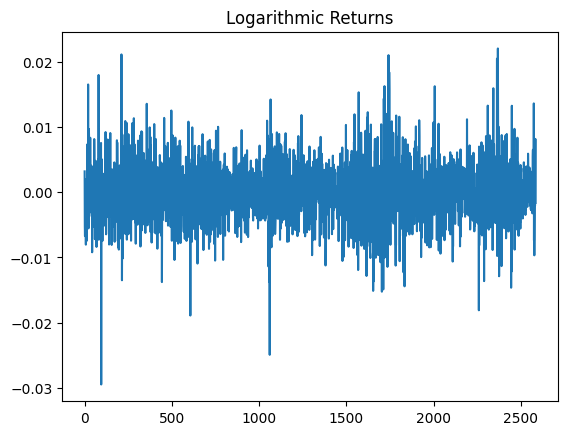

In [38]:
returns = data["Zamkniecie"] / data["Otwarcie"]
log_returns = np.log(returns)

plt.plot(log_returns)
plt.title("Logarithmic Returns")
plt.show

In [209]:
# descriptive statistics

# mean 
mean = np.mean(log_returns)

# variance
variance = np.var(log_returns)

# standard deviation 
sigma = np.std(log_returns)
# alternative: sigma = variance ** 1/2 

# function for moment of distribution
def moments(data, n):
    """ Calculating the n-th moment of the distribution.
    Parameters: 
    - data: 
    - n: the order of the moment """
    mean = np.mean(data)
    return np.mean((data - mean)**n)

for n in range(2, 5): # calculating 2nd, 3rd and 4th moment
    m = moments(log_returns, n)
    print(str(n) + "-th moment: " + str(m))

skewness = moments(log_returns, 3) / sigma**3 
kurtosis = moments(log_returns, 4) / sigma**4

print("Skewness: " + str(skewness))
print("Kurtosis: " + str(kurtosis))

# Jarque Berra Test
T = len(log_returns)
JB = (skewness ** 2) * T / 6 + ((kurtosis-3)** 2) * T / 24
print(JB)

# chi-squared distibution with 2 DOF 

2-th moment: 2.0681342440779503e-05
3-th moment: 4.850892189366497e-09
4-th moment: 2.247371776655722e-09
Skewness: 0.05157669792489806
Kurtosis: 5.254331522002324
548.7331704816728
